<a href="https://colab.research.google.com/github/halfbakedem/Projects-in-advanced-ML/blob/main/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advanced Projects in Machine Learning: Homework 1

Submitted by: Emily Tan

Github repo: [https://github.com/halfbakedem/Projects-in-advanced-ML](https://github.com/halfbakedem/Projects-in-advanced-ML)



Setting up and preprocessing data 

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/advanced ML')


Mounted at /content/drive


In [3]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [4]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


#Part 1: Bivariate Data Analysis

The two box plots below demonstrate that, on average, countries which have higher healthy life expectancy and levels of social support are more likely to rank 'Very High' on the happiness index. This suggests that these are two potentially important variables in predicting for happy countries

Text(0, 0.5, 'Healthy life expectancy')

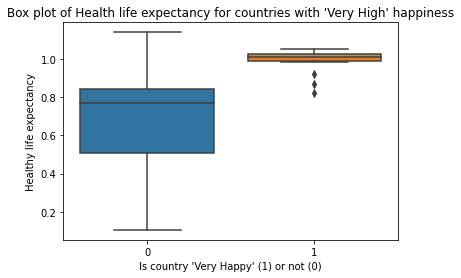

In [53]:
import seaborn as sns

df = pd.concat([y_train, X_train], axis=1, join='inner')

sns.boxplot(data=df, x="Very High", y="Healthy life expectancy")
# add a title
plt.title("Box plot of Health life expectancy for countries with 'Very High' happiness")
# add a label to the x/y-axis
plt.xlabel("Is country 'Very Happy' (1) or not (0)")
plt.ylabel("Healthy life expectancy")

Text(0, 0.5, 'Social Support')

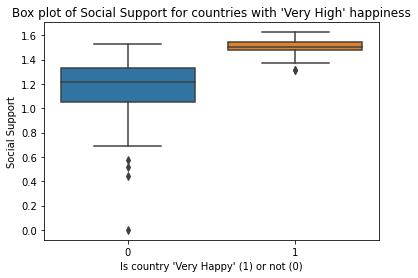

In [49]:
sns.boxplot(data=df, x="Very High", y="Social support")
# add a title
plt.title("Box plot of Social Support for countries with 'Very High' happiness")
# add a label to the x/y-axis
plt.xlabel("Is country 'Very Happy' (1) or not (0)")
plt.ylabel("Social Support")

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [6]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [7]:
#Save preprocessor
import aimodelshare as ai

ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


Set up modelshare.org

In [8]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [11]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

#Part 2: Prediction models of Random Forest Classifier, Gradient Boosting and Keras NN

I attempted to run and fit three different types of models for this dataset. Below is a summary of the features selection and subsequent results for the best iterations of each model type 

1.   Random forest classifier, max_depth=7, n_estimators=100, F1 score=0.509
2.   Gradient boosting classifier, learning_rate=1, max_depth=5, n_estimators=125,F1 score=0.474
3. 3-layer NN, batch=10, epoch=200, batch size=125, F1 score=0.429

Hence, my random forest classifier was the best model. In the following section, I will adopt parameters suggested by my teammates on slack to try and improve each of these models.

Model 1: Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid1 = {'n_estimators': np.arange(25, 200, 25),'max_depth':[1, 3, 5, 7]} 

model1 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid1, cv=10)

#use meta model methods to fit score and predict model:
model1.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(model1.best_score_))
print("best parameters: {}".format(model1.best_params_))


best mean cross-validation score: 0.717
best parameters: {'max_depth': 7, 'n_estimators': 50}


In [10]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [12]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model1.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 464

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


Model 2: Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'n_estimators': np.arange(50, 300, 25), 'learning_rate':[0.6,0.8,1], 'max_depth':[1, 3, 5]} #np.arange creates sequence of numbers for each k value

model2 = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
model2.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(model2.best_score_))
print("best parameters: {}".format(model2.best_params_))


best mean cross-validation score: 0.662
best parameters: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}


In [14]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = model2.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 467

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


Model 3: Tensor flow

In [15]:
# Import relevant modules from TensorFlow
import tensorflow as tf
from tensorflow.keras import layers

# define the model architecture
model3 = tf.keras.Sequential()

# add the first convolutional layer with 16 filters and 'relu' activation
model3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu'))

# add max pooling with a 2 by 2 filter
model3.add(tf.keras.layers.MaxPooling2D((4, 4)))

# add the second convolutional layer with 28 filters and 'relu' activation
model3.add(tf.keras.layers.Conv2D(28, (3, 3), activation='relu'))

# add max pooling with a 2 by 2 filter
model3.add(tf.keras.layers.MaxPooling2D((4, 4)))

# add the output layer with 'softmax' activation
model3.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile the model using 'sgd' optimizer
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Import relevant modules from TensorFlow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD


model3 = Sequential([
    Dense(32, input_dim=(26)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(5),
    Activation('softmax'),
])

# compile the model using 'sgd' optimizer
model3.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])

In [17]:
# fitting the model
import numpy as np
tf.config.run_functions_eagerly(True)
model3.fit(preprocessor(X_train), y_train, validation_split=0.25, epochs=200, batch_size=10)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/200
6/7 [========================>.....] - ETA: 0s - loss: 1.6226 - accuracy: 0.2500

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 2s 139ms/step - loss: 1.6175 - accuracy: 0.2424 - val_loss: 1.5861 - val_accuracy: 0.4091
Epoch 2/200
7/7 [==============================] - 1s 127ms/step - loss: 1.5932 - accuracy: 0.2727 - val_loss: 1.5747 - val_accuracy: 0.4091
Epoch 3/200
7/7 [==============================] - 1s 105ms/step - loss: 1.5727 - accuracy: 0.2727 - val_loss: 1.5627 - val_accuracy: 0.4545
Epoch 4/200
7/7 [==============================] - 1s 89ms/step - loss: 1.5542 - accuracy: 0.2727 - val_loss: 1.5520 - val_accuracy: 0.4545
Epoch 5/200
7/7 [==============================] - 1s 136ms/step - loss: 1.5364 - accuracy: 0.3030 - val_loss: 1.5420 - val_accuracy: 0.4545
Epoch 6/200
7/7 [==============================] - 1s 92ms/step - loss: 1.5195 - accuracy: 0.3333 - val_loss: 1.5319 - val_accuracy: 0.4545
Epoch 7/200
7/7 [==============================] - 0s 65ms/step - loss: 1.5044 - accuracy: 0.3636 - val_loss: 1.5241 - val_accuracy: 0.5000
Epoch 8/200
7/7 [===========

In [18]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model3, framework='keras',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels=model3.predict(preprocessor(X_test))
prediction_labels=np.argmax(prediction_labels,axis=-1)
labels = {0: 'Average', 1: 'High', 2: 'Low', 3: 'Very High', 4: 'Very Low'}
prediction_labels = [labels[i] for i in prediction_labels]


# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

3/3 [==============================] - 0s 6ms/step


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 469

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#Part 3: Improving place on leaderboard!

Attempt to improve models based on tuning parameters suggested by my teammates.

Model 4: Random Forest

Using Anne's parameters to improve model: Change n_estimators from 100 to 200.

Unfortunately, this did not improve my F1 score:(

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

model4 = RandomForestClassifier(n_estimators=200, max_depth=7)

#use meta model methods to fit score and predict model:
model4.fit(preprocessor(X_train), y_train_labels)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model4, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 4: 

#-- Generate predicted values (Model 4)
prediction_labels = model4.predict(preprocessor(X_test))

# Submit Model 4 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

##F1: 0.49, model version 271; did not improve:(

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 271

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


Model 5: improved Gradient Boost

Using Oliver's parameters for gradient boosting: change n_estimators from 125 to 52, learning rate from 1 to 1.115 and max_depth from 5 to 1.

This worked in improving my score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np



model5 = GradientBoostingClassifier(n_estimators=52, learning_rate=1.115, max_depth=1)

#use meta model methods to fit score and predict model:
model5.fit(preprocessor(X_train), y_train_labels)


GradientBoostingClassifier(learning_rate=1.115, max_depth=1, n_estimators=52)

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model5, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = model5.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

##F1: 0.487, model version 270; improved:)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 269

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


Model 6: Neural Network

None of my teammates attempted a 3-layer NN. I think that continuing down the path of 3-layer NN is the right one as my model generated the highest F1 score amongst my teammates. However, I did learn that I could perhaps increase the epochs and batch size.

In [ ]:
# Import relevant modules from TensorFlow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD


model6 = Sequential([
    Dense(32, input_dim=(26)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(5),
    Activation('softmax'),
])

# compile the model using 'sgd' optimizer
model6.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
# fitting the model
import numpy as np
tf.config.run_functions_eagerly(True)
model6.fit(preprocessor(X_train), y_train, validation_split=0.25, epochs=300, batch_size=30)

Epoch 1/300
3/3 [==============================] - 0s 115ms/step - loss: 1.6260 - accuracy: 0.1515 - val_loss: 1.6419 - val_accuracy: 0.1818
Epoch 2/300
3/3 [==============================] - 0s 69ms/step - loss: 1.6192 - accuracy: 0.1364 - val_loss: 1.6370 - val_accuracy: 0.1364
Epoch 3/300
3/3 [==============================] - 0s 67ms/step - loss: 1.6135 - accuracy: 0.1818 - val_loss: 1.6317 - val_accuracy: 0.1818
Epoch 4/300
3/3 [==============================] - 0s 61ms/step - loss: 1.6065 - accuracy: 0.1970 - val_loss: 1.6280 - val_accuracy: 0.1818
Epoch 5/300
3/3 [==============================] - 0s 62ms/step - loss: 1.6014 - accuracy: 0.2121 - val_loss: 1.6235 - val_accuracy: 0.2273
Epoch 6/300
3/3 [==============================] - 0s 74ms/step - loss: 1.5956 - accuracy: 0.2273 - val_loss: 1.6187 - val_accuracy: 0.2273
Epoch 7/300
3/3 [==============================] - 0s 87ms/step - loss: 1.5892 - accuracy: 0.2273 - val_loss: 1.6115 - val_accuracy: 0.2273
Epoch 8/300
3/3 [==

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model6, framework='keras',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels=model6.predict(preprocessor(X_test))
prediction_labels=np.argmax(prediction_labels,axis=-1)
labels = {0: 'Average', 1: 'High', 2: 'Low', 3: 'Very High', 4: 'Very Low'}
prediction_labels = [labels[i] for i in prediction_labels]


# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

#F1: 0.482, model version 272; improved!!!

3/3 [==============================] - 0s 7ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 272

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,relu_act,softmax_act,loss,optimizer,memory_size,team,username,version
0,58.82%,57.65%,65.59%,59.50%,sklearn,False,False,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,yatharth,58
1,55.88%,51.89%,69.50%,56.64%,sklearn,False,False,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,yatharth,68
2,55.88%,51.89%,69.50%,56.64%,sklearn,False,False,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,yatharth,66
3,52.94%,51.56%,71.39%,55.29%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,nan,6.000000,bobbie8881,123
4,52.94%,51.56%,71.39%,55.29%,sklearn,False,False,GaussianNB,nan,nan,nan,nan,nan,nan,nan,nan,6.000000,bobbie8881,125
5,52.94%,50.96%,72.38%,55.29%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,nan,5.000000,halfbaked_em,127
6,55.88%,55.63%,63.33%,57.00%,sklearn,False,False,SVC,nan,nan,nan,nan,nan,nan,nan,nan,9.000000,sofiazaidman,14
7,52.94%,51.25%,65.11%,55.29%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,ivster,29
8,50.00%,50.23%,66.11%,51.29%,sklearn,False,False,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,5.000000,oliverhegi,159
9,50.00%,48.71%,67.34%,51.29%,sklearn,False,False,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,5.000000,oliverhegi,155
